# "Scrape This Site": Hockey Teams Data

In [1]:
# Import dependencies.

from bs4 import BeautifulSoup
import requests
import pandas as pd

In [2]:
# Define the base URL as well as the number of pages to scrape from (i.e., 3 pages out of 25 total).

base_url = 'https://www.scrapethissite.com/pages/forms/'
page_nums = 3

In [3]:
# Define a function to set up BeautifulSoup and extract the table on the page.

def extract_tables(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html')
    table = soup.find('table', class_ = 'table')
    df = pd.read_html(str(table))[0]
    return df

In [4]:
# Create an empty list to store all 3 tables from across the 3 pages.

dataframes = []

# Utilize a For Loop to extract the tables on each page. 

for page in range(1, page_nums+1):
    url = base_url + f"?page_num={page}"
    df_on_page = extract_tables(url)
    dataframes.append(df_on_page)

In [5]:
# Concatenate the tables together and display. 

final_df = pd.concat(dataframes)
final_df.head()

,Team Name,Year,Wins,Losses,OT Losses,Win %,Goals For (GF),Goals Against (GA),+ / -
0,Boston Bruins,1990,44,24,NaN,0.550,299,264,35
1,Buffalo Sabres,1990,31,30,NaN,0.388,292,278,14
2,Calgary Flames,1990,46,26,NaN,0.575,344,263,81
3,Chicago Blackhawks,1990,49,23,NaN,0.613,284,211,73
4,Detroit Red Wings,1990,34,38,NaN,0.425,273,298,-25


In [6]:
# Remove the column, 'OT Losses', as its values are null. 

cleaned_df = final_df.drop(columns=['OT Losses'])

In [7]:
# Check to find any remaining null values.

cleaned_df.isnull().sum()

Team Name             0
Year                  0
Wins                  0
Losses                0
Win %                 0
Goals For (GF)        0
Goals Against (GA)    0
+ / -                 0
dtype: int64

In [8]:
# Check the data types for each column. 

cleaned_df.dtypes

Team Name              object
Year                    int64
Wins                    int64
Losses                  int64
Win %                 float64
Goals For (GF)          int64
Goals Against (GA)      int64
+ / -                   int64
dtype: object

In [9]:
# Display the cleaned DataFrame.

cleaned_df.head()

,Team Name,Year,Wins,Losses,Win %,Goals For (GF),Goals Against (GA),+ / -
0,Boston Bruins,1990,44,24,0.550,299,264,35
1,Buffalo Sabres,1990,31,30,0.388,292,278,14
2,Calgary Flames,1990,46,26,0.575,344,263,81
3,Chicago Blackhawks,1990,49,23,0.613,284,211,73
4,Detroit Red Wings,1990,34,38,0.425,273,298,-25


In [10]:
# Extract only the first 25 rows or the first table.

first_page = cleaned_df[0:25]
first_page.head()

,Team Name,Year,Wins,Losses,Win %,Goals For (GF),Goals Against (GA),+ / -
0,Boston Bruins,1990,44,24,0.550,299,264,35
1,Buffalo Sabres,1990,31,30,0.388,292,278,14
2,Calgary Flames,1990,46,26,0.575,344,263,81
3,Chicago Blackhawks,1990,49,23,0.613,284,211,73
4,Detroit Red Wings,1990,34,38,0.425,273,298,-25


In [11]:
# Import additional dependencies for plotting. 

import seaborn as sns
import matplotlib.pyplot as plt

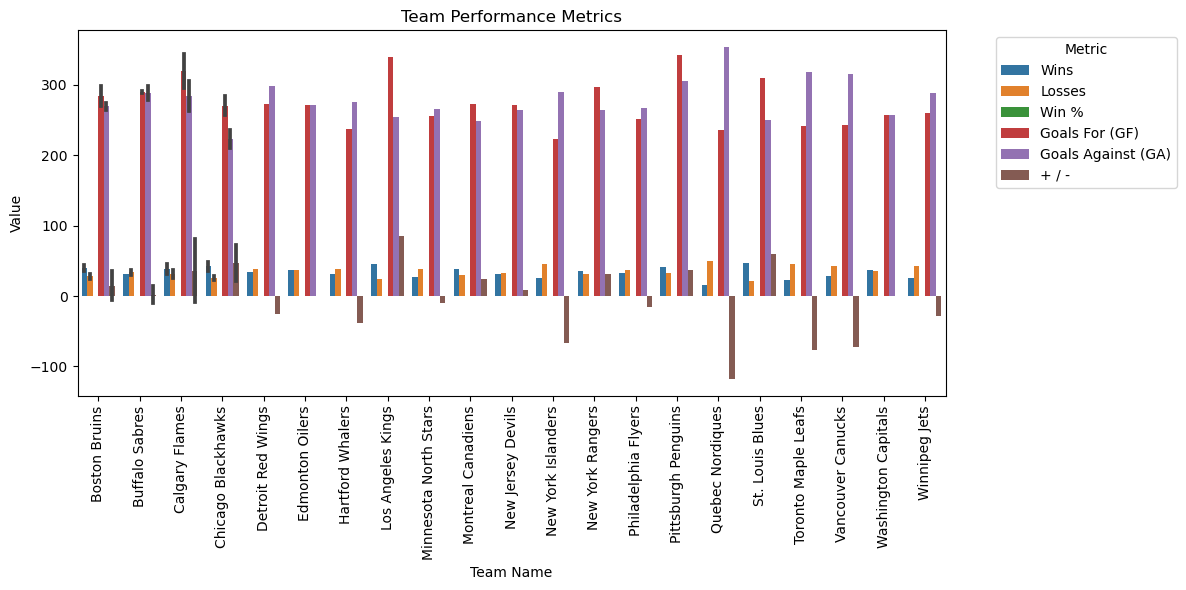

In [12]:
# Sample plotting. 

melted_df = pd.melt(first_page, id_vars=['Team Name', 'Year'], var_name='Metric', value_name='Value')

# Create the grouped bar chart using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=melted_df, x='Team Name', y='Value', hue='Metric')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Team Name')
plt.ylabel('Value')
plt.title('Team Performance Metrics')
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()